## 4. Exploring Relationships

### This script contains the following points:

### 1. Import Libraries

### 2. Import Data

### 3. Data Consistency Checks

### 4. Exploring Relationships

#### 4.1 Correlations

#### 4.2 Scatterplots

#### 4.3 Pair Plots

#### 4.4 Categorical Plots

### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Check version of matplotlib
matplotlib.__version__

'3.3.2'

In [4]:
# Display charts in the notebook without the need to "call" them specifically.
%matplotlib inline

### 2. Import Data

In [5]:
# Creating path string to data folder
path = r'C:\Users\bexlu\Desktop\Career Foundry\Data Immersion\Achievement 6\Project Folder'

In [6]:
# Importing csv file using os library
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hate_crime_2015.csv'), index_col = False)

### 3. Data Consistency Checks

In [7]:
# Print of first five rows of df
df.head()

,STATE,TOTAL_CRIME,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE
0,Alabama,10,0.4811,0.154,44765,52.6,3878471,346494
1,Alaska,8,0.4322,0.107,73355,62.1,571393,25978
2,Arizona,276,0.4702,0.134,51492,54.5,5393214,478515
3,Arkansas,6,0.4773,0.165,41995,54.0,2352507,194395
4,California,837,0.4876,0.118,64500,58.1,31068647,3576743


In [8]:
# Check shape of dataframe
df.shape

(49, 8)

In [9]:
# Print of number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   STATE                            49 non-null     object 
 1   TOTAL_CRIME                      49 non-null     int64  
 2   GINI_INDEX                       49 non-null     float64
 3   POVERTY_RATE                     49 non-null     float64
 4   MEDIAN_HOUSEHOLD_INCOME          49 non-null     int64  
 5   EMPLOYMENT_RATE                  49 non-null     float64
 6   POPULATION_>16                   49 non-null     int64  
 7   POPULATION<HIGH_SCHOOL_GRADUATE  49 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 3.2+ KB


In [10]:
# Apply function that checks df for mixed type columns
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [11]:
# No mixed data found

### 4. Exploring Relationships

#### 4.1 Correlations

In [12]:
# Create a correlation matrix using pandas
df.corr()

,TOTAL_CRIME,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE
TOTAL_CRIME,1.000000,0.398284,-0.036538,0.197918,-0.112397,0.745201,0.720719
GINI_INDEX,0.398284,1.000000,0.498181,-0.002590,-0.365452,0.414984,0.386255
POVERTY_RATE,-0.036538,0.498181,1.000000,-0.711225,-0.753380,0.065984,0.112106
MEDIAN_HOUSEHOLD_INCOME,0.197918,-0.002590,-0.711225,1.000000,0.664461,0.053634,0.038815
EMPLOYMENT_RATE,-0.112397,-0.365452,-0.753380,0.664461,1.000000,-0.193580,-0.190034
POPULATION_>16,0.745201,0.414984,0.065984,0.053634,-0.193580,1.000000,0.964712
POPULATION<HIGH_SCHOOL_GRADUATE,0.720719,0.386255,0.112106,0.038815,-0.190034,0.964712,1.000000


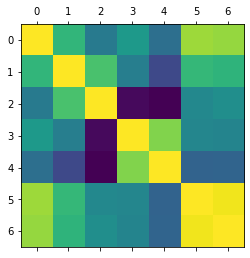

In [13]:
# Create a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

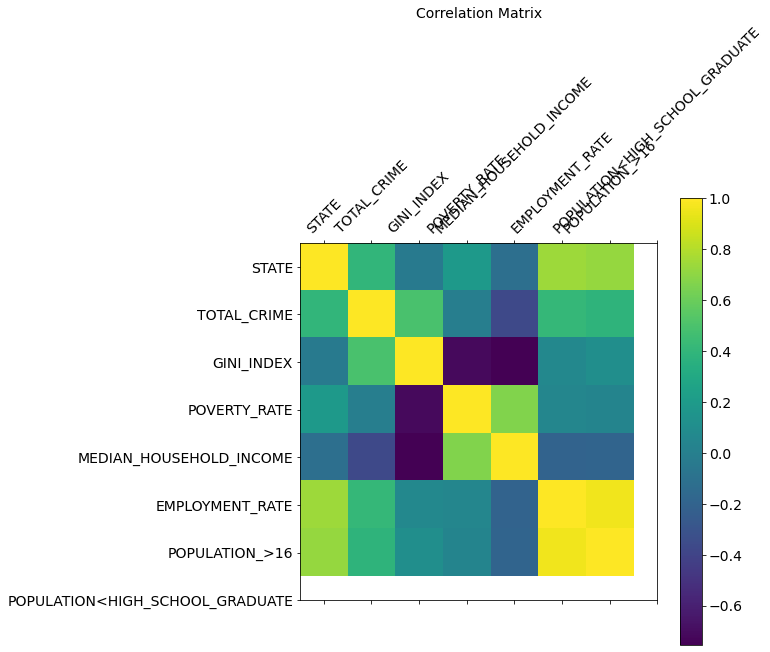

In [14]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [15]:
# Create heatmap using Seaborn
df.columns

Index(['STATE', 'TOTAL_CRIME', 'GINI_INDEX', 'POVERTY_RATE',
       'MEDIAN_HOUSEHOLD_INCOME', 'EMPLOYMENT_RATE', 'POPULATION_>16',
       'POPULATION<HIGH_SCHOOL_GRADUATE'],
      dtype='object')

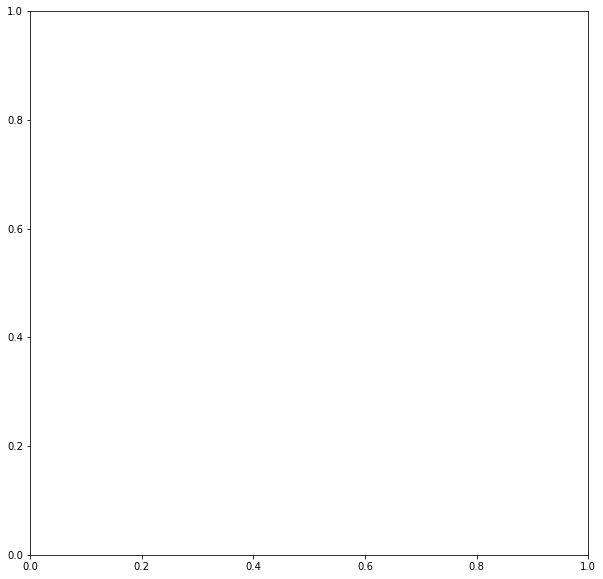

In [16]:
# Create a subplot with matplotlib. 
f,ax = plt.subplots(figsize=(10,10))

In [17]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) 

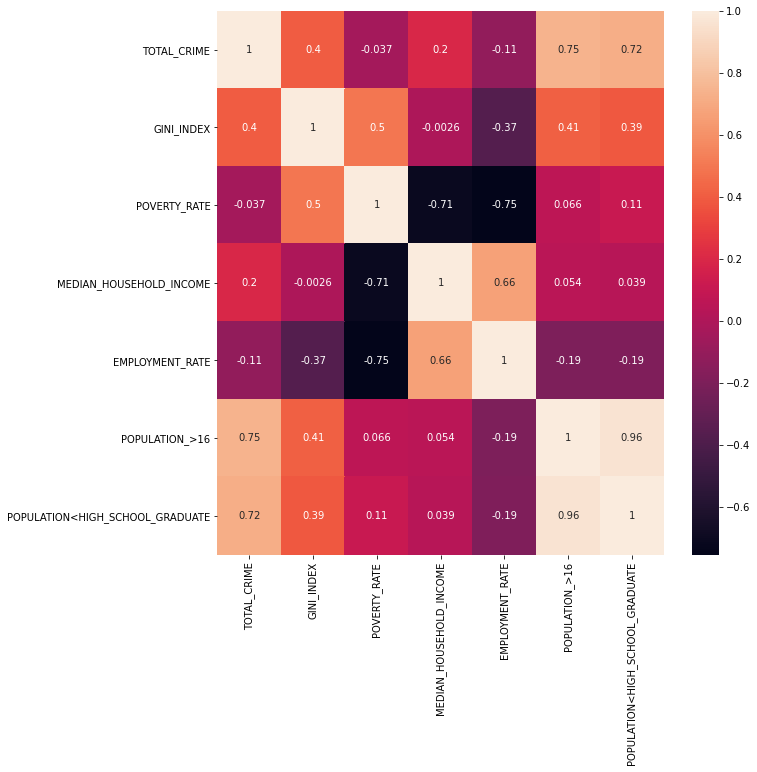

In [18]:
# Display heatmap
corr.figure

#### 4.2 Scatterplots

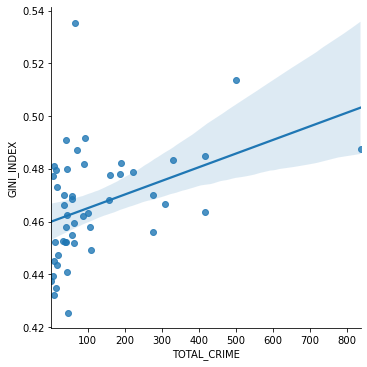

In [19]:
# Create a scatterplot for the "TOTAL_CRIME" and "GINI_INDEX" columns in seaborn
sns.lmplot(x = 'TOTAL_CRIME', y = 'GINI_INDEX', data = df)

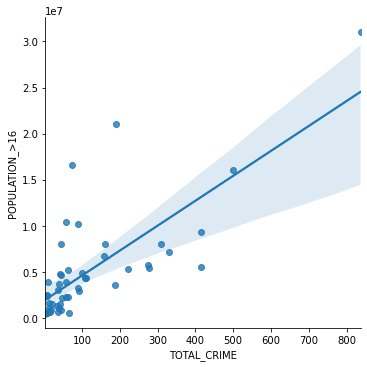

In [20]:
# Create a scatterplot for the "TOTAL_CRIME" and "POPULATION_>16" columns in seaborn
sns.lmplot(x = 'TOTAL_CRIME', y = 'POPULATION_>16', data = df)

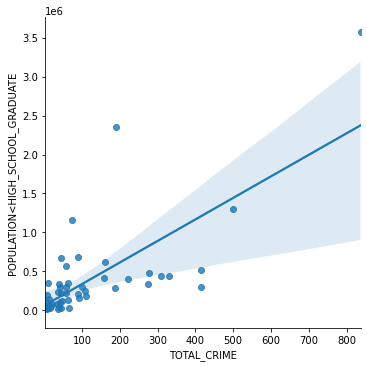

In [21]:
# Create a scatterplot for the "TOTAL_CRIME" and "POPULATION_>16" columns in seaborn
sns.lmplot(x = 'TOTAL_CRIME', y = 'POPULATION<HIGH_SCHOOL_GRADUATE', data = df)

#### 4.3 Pair Plots

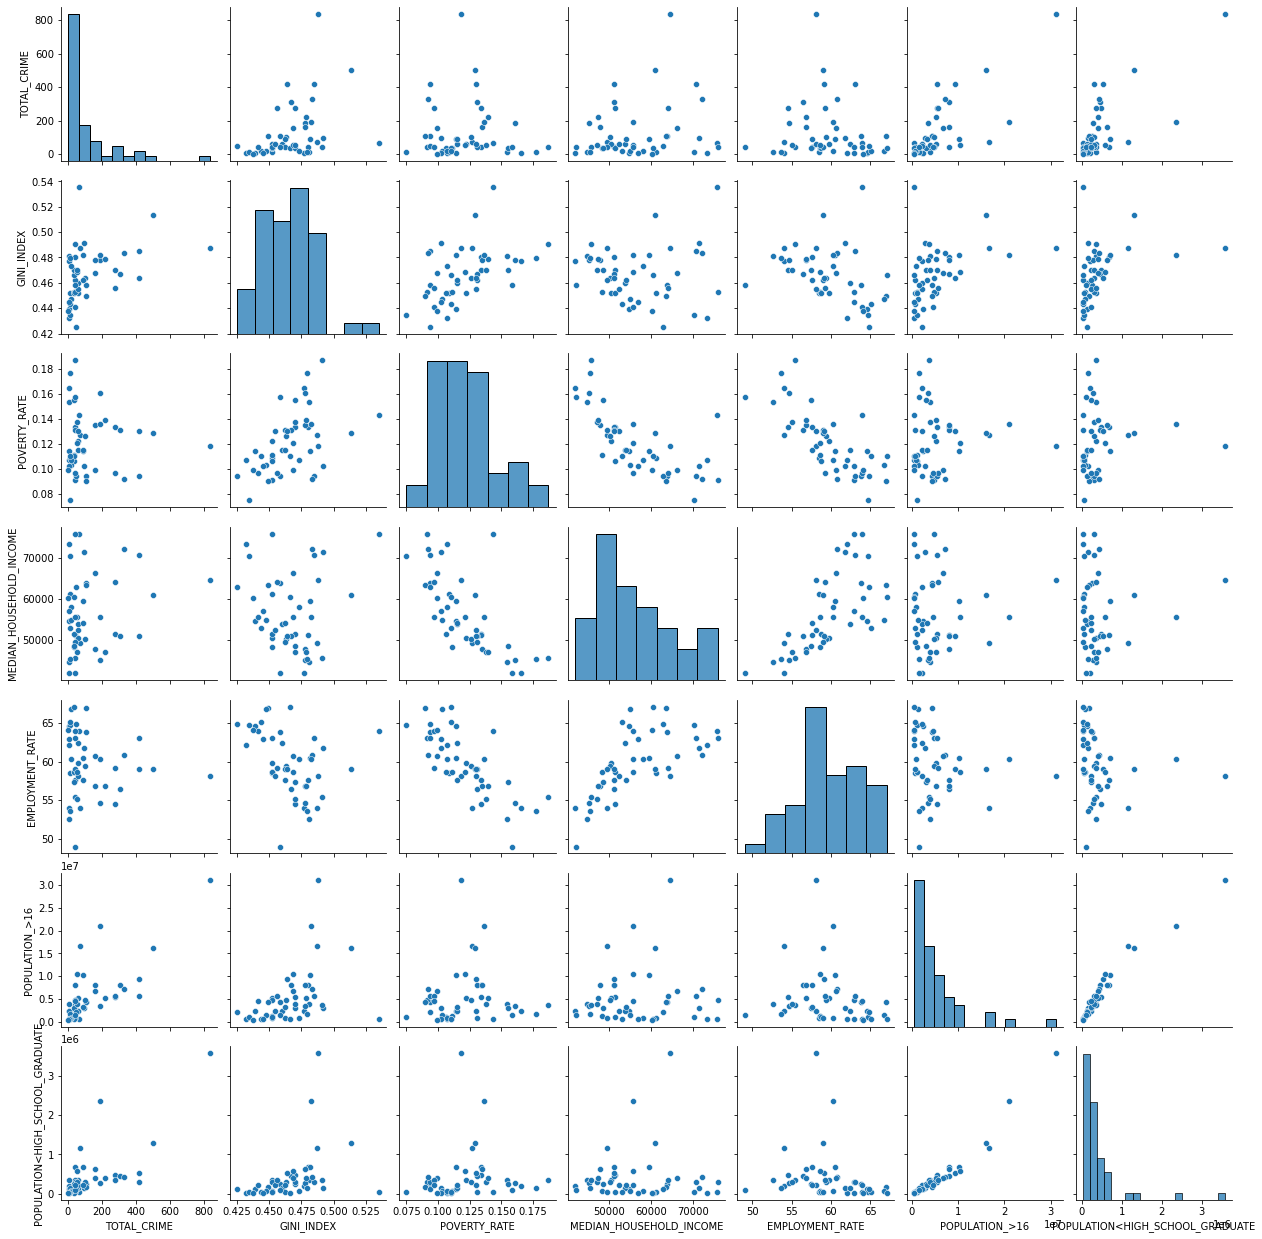

In [22]:
# Create a pair plot for all variables
g = sns.pairplot(df)

#### 4.4 Categorical Plots

C:\Users\bexlu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GINI_INDEX', ylabel='Density'>

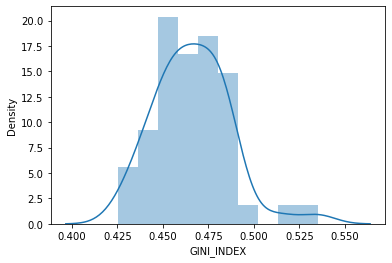

In [23]:
# Use a histogram to visualise the distribution of 'GINI_INDEX' ro inform values for categorisation
sns.distplot(df['GINI_INDEX'], bins = 10 )

In [24]:
# Find minimum value of 'GINI_INDEX' variable
df['GINI_INDEX'].min()

0.4252

In [25]:
# Find maximum value of 'GINI_INDEX' variable
df['GINI_INDEX'].max()

0.5354

In [26]:
# Find mean value of 'GINI_INDEX' variable
df['GINI_INDEX'].mean()

0.46609999999999985

In [27]:
# Create new variable GINI_CATEGORY using loc function
df.loc[df['GINI_INDEX'] < 0.45, 'GINI_CATEGORY'] = 'Lower Income Inequality'

In [28]:
df.loc[(df['GINI_INDEX'] >= 0.45) & (df['GINI_INDEX'] < 0.475), 'GINI_CATEGORY'] = 'Medium Income Inequality'

In [29]:
df.loc[df['GINI_INDEX'] > 0.475, 'GINI_CATEGORY'] = 'Higher Income Inequality'

In [30]:
# Frequency check new variable
df['GINI_CATEGORY'].value_counts(dropna = False)

Medium Income Inequality    22
Higher Income Inequality    17
Lower Income Inequality     10
Name: GINI_CATEGORY, dtype: int64

In [31]:
# Print Column names
df.columns

Index(['STATE', 'TOTAL_CRIME', 'GINI_INDEX', 'POVERTY_RATE',
       'MEDIAN_HOUSEHOLD_INCOME', 'EMPLOYMENT_RATE', 'POPULATION_>16',
       'POPULATION<HIGH_SCHOOL_GRADUATE', 'GINI_CATEGORY'],
      dtype='object')

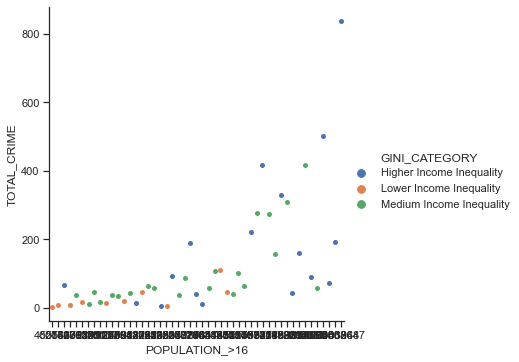

In [34]:
# Create a categorical plot in seaborn
sns.set(style='ticks')
g = sns.catplot(x='POPULATION_>16', y='TOTAL_CRIME', hue='GINI_CATEGORY', data=df)

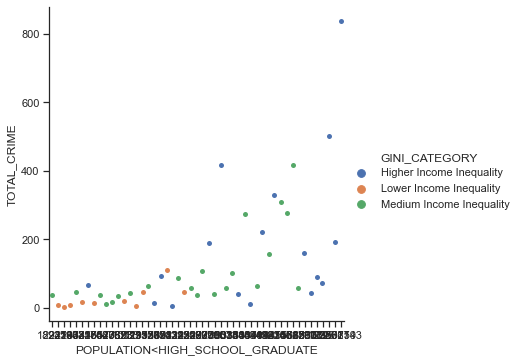

In [35]:
# Create a categorical plot in seaborn
sns.set(style='ticks')
g = sns.catplot(x='POPULATION<HIGH_SCHOOL_GRADUATE', y='TOTAL_CRIME', hue='GINI_CATEGORY', data=df)